In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv


In [2]:
df = pd.read_csv('/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv')

In [3]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [4]:
df.set_index('Rank',inplace=True)
df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,,,,,,,
1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [5]:
df.isnull().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [6]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print(duplicates)


Empty DataFrame
Columns: [Country, Cost of Living Index, Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, Local Purchasing Power Index]
Index: []


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# plotting a line plot
# know the trends in the data
plt.figure(figsize=(16,6))
sns.lineplot(data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rank'>

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df['Local Purchasing Power Index'])

In [ ]:
plt.figure(figsize = (8,6))
plt.title('scatter plot of Cost of Living Index versus Restaurant Price Index')
sns.scatterplot(x=df['Restaurant Price Index'],y = df['Cost of Living Index'])

Restaurant Price Index is positively correlated with cost of living index. i.e. as Restaurant Price Index increases cost of living index also increases.

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=df['Rent Index'],y = df['Cost of Living Index'])
plt.title('scatter plot of Cost of Living Index versus Rent Index')

Rent Index is positively correlated with cost of living index. i.e. as Rent Index increases cost of living index also increases.

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=df['Cost of Living Plus Rent Index'],y = df['Cost of Living Index'])
plt.title('scatter plot of Cost of Living Index versus Cost of Living Plus Rent Index')

Cost of Living Plus Rent Index has high positive correlation with cost of living index. i.e. as Cost of Living Plus Rent Index increases cost of living index also increases.

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=df['Groceries Index'],y = df['Cost of Living Index'])
plt.title('scatter plot of Cost of Living Index versus Groceries Index')

Groceries Index has high positive correlation with cost of living index. i.e. as Groceries Index increases cost of living index also increases.

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=df['Local Purchasing Power Index'],y = df['Cost of Living Index'])
plt.title('scatter plot of Cost of Living Index versus Local Purchasing Power Index')

Local Purchasing Power Index has  positive correlation with cost of living index. i.e. as Local Purchasing Power Index increases cost of living index also increases.

In [ ]:
top_20_df = df.nlargest(20, 'Cost of Living Index')

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.title()
sns.swarmplot(x=top_20_df.index, y=top_20_df['Cost of Living Index'], hue=top_20_df['Country'], palette='viridis')
plt.title('Categorical Scatter Plot of Cost of Living Index versus Top 20 Most Expensive Countries')
plt.xlabel('Country Index')
plt.ylabel('Cost of Living Index')
plt.xticks(ticks=top_20_df.index, labels=top_20_df['Country'], rotation=45)
plt.legend(title='Country')
plt.show()

#  Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Local Purchasing Power Index', ylabel='Count'>

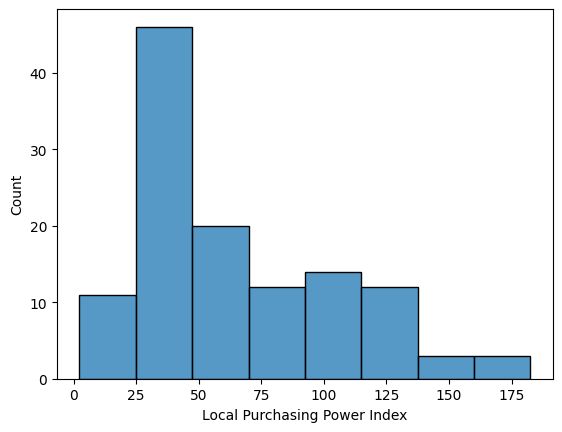

In [18]:
sns.histplot(df['Local Purchasing Power Index'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Groceries Index', ylabel='Density'>

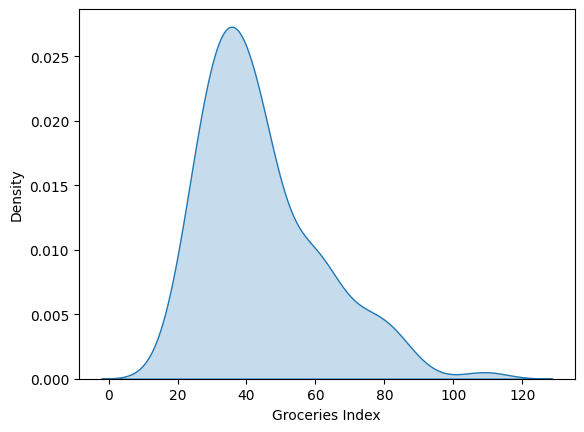

In [19]:
sns.kdeplot(df['Groceries Index'],fill=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cost of Living Plus Rent Index', ylabel='Count'>

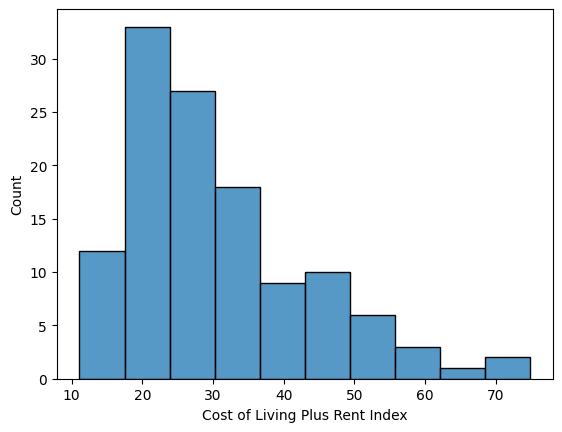

In [20]:
sns.histplot(df['Cost of Living Plus Rent Index'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cost of Living Index', ylabel='Count'>

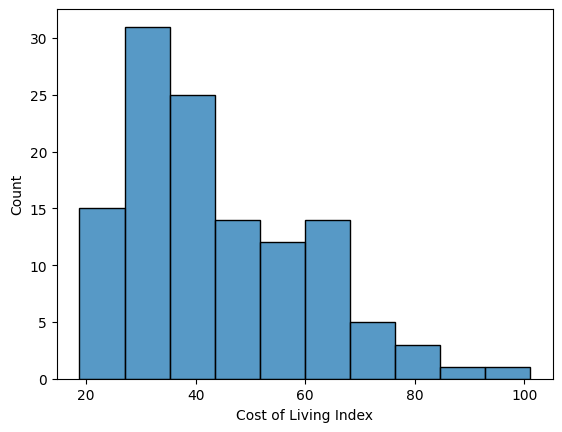

In [21]:
sns.histplot(df['Cost of Living Index'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent Index', ylabel='Count'>

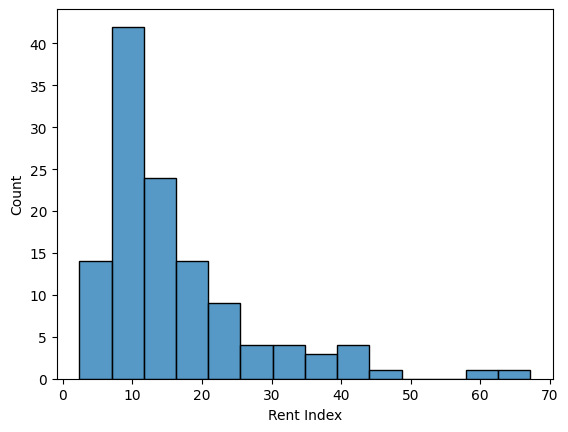

In [22]:
sns.histplot(df['Rent Index'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Restaurant Price Index', ylabel='Count'>

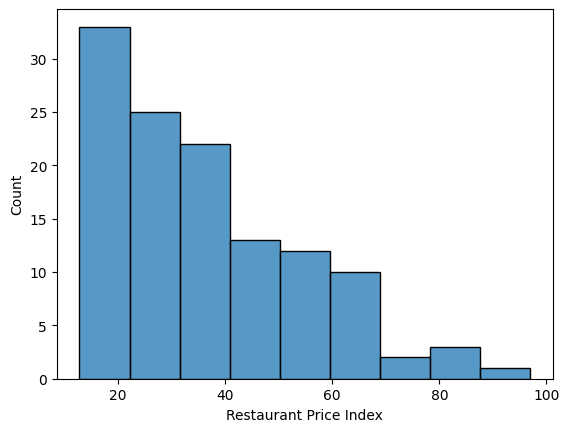

In [23]:
sns.histplot(df['Restaurant Price Index'])